<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 1: Standardized Test Analysis - Part 1

## Problem Statement

*Standardized tests have become more and more unreliable as technology progresses. With new college majors and new skillsets being more indemand in the market, standardized tests no longer measures the potential of students. Which is why standardized tests, should be optional for college admission applications.*

### Contents:
- [Background](#Background)
- [Data Import & Cleaning](#Data-Import-and-Cleaning)

## Background

The SAT and ACT are standardized tests that many colleges and universities in the United States require for their admissions process. This score is used along with other materials such as grade point average (GPA) and essay responses to determine whether or not a potential student will be accepted to the university.

The SAT has two sections of the test: Evidence-Based Reading and Writing and Math ([*source*](https://www.princetonreview.com/college/sat-sections)). The ACT has 4 sections: English, Mathematics, Reading, and Science, with an additional optional writing section ([*source*](https://www.act.org/content/act/en/products-and-services/the-act/scores/understanding-your-scores.html)). They have different score ranges, which you can read more about on their websites or additional outside sources (a quick Google search will help you understand the scores for each test):
* [SAT](https://collegereadiness.collegeboard.org/sat)
* [ACT](https://www.act.org/content/act/en.html)

Standardized tests have long been a controversial topic for students, administrators, and legislators. Since the 1940's, an increasing number of colleges have been using scores from sudents' performances on tests like the SAT and the ACT as a measure for college readiness and aptitude ([*source*](https://www.minotdailynews.com/news/local-news/2017/04/a-brief-history-of-the-sat-and-act/)). Supporters of these tests argue that these scores can be used as an objective measure to determine college admittance. Opponents of these tests claim that these tests are not accurate measures of students potential or ability and serve as an inequitable barrier to entry. Lately, more and more schools are opting to drop the SAT/ACT requirement for their Fall 2021 applications ([*read more about this here*](https://www.cnn.com/2020/04/14/us/coronavirus-colleges-sat-act-test-trnd/index.html)).

Additional data are dataset of California income by county. ([*source*](https://en.wikipedia.org/wiki/List_of_California_locations_by_income))

### Import required libraries

In [1]:
# Imports:
#data manipulation
import numpy as np
import pandas as pd

#visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Functions that will be used in 'Data Cleaning'

In [2]:
# Function to convert percentage string to float
def convert_pct(string):
    return float(string.replace("%",""))/100

convert_pct('55%')

0.55

In [3]:
# Function to convert number string to float
def convert_num(string):
    return float(string.replace(",",""))

convert_num('55,000')

55000.0

## Data Import and Cleaning

#### Import datasets and investigate the size of each datasets

In [4]:
# Read csv into DataFrame

# ACT data
act_2017 = pd.read_csv('../data/act_2017.csv')
act_2018 = pd.read_csv('../data/act_2018.csv')
act_2019 = pd.read_csv('../data/act_2019.csv')
act_2019_ca = pd.read_csv('../data/act_2019_ca.csv')

# SAT data
sat_2017 = pd.read_csv('../data/sat_2017.csv')
sat_2018 = pd.read_csv('../data/sat_2018.csv')
sat_2019 = pd.read_csv('../data/sat_2019.csv')
sat_2019_ca = pd.read_csv('../data/sat_2019_ca.csv')

# General college data
sat_2019_by_c_maj = pd.read_csv('../data/sat_2019_by_intended_college_major.csv')
sat_act_by_college = pd.read_csv('../data/sat_act_by_college.csv')

In [5]:
# Create a dictionary of dataframes

act = {'act_2017':act_2017,'act_2018':act_2018,'act_2019':act_2019,'act_2019_ca':act_2019_ca}
sat = {'sat_2017':sat_2017,'sat_2018':act_2018,'sat_2019':sat_2019,'sat_2019_ca':sat_2019_ca}
sat_college = {'sat_2019_by_c_maj':sat_2019_by_c_maj,'sat_act_by_college':sat_act_by_college}

In [6]:
# Check the shapes of ACT dataframes
for name,df in act.items():
    print(f'The shape of DataFrame {name} is {df.shape}')

The shape of DataFrame act_2017 is (52, 7)
The shape of DataFrame act_2018 is (52, 3)
The shape of DataFrame act_2019 is (52, 3)
The shape of DataFrame act_2019_ca is (2310, 18)


In [7]:
# Check the shapes of sat dataframe
for name,df in sat.items():
    print(f'The shape of DataFrame {name} is {df.shape}')

The shape of DataFrame sat_2017 is (51, 5)
The shape of DataFrame sat_2018 is (52, 3)
The shape of DataFrame sat_2019 is (53, 5)
The shape of DataFrame sat_2019_ca is (2580, 26)


In [8]:
# Check the shapes of general college dataframe
for name,df in sat_college.items():
    print(f'The shape of DataFrame {name} is {df.shape}')

The shape of DataFrame sat_2019_by_c_maj is (38, 6)
The shape of DataFrame sat_act_by_college is (416, 8)


#### Cleaning : SAT dataframe

In [9]:
# Check SAT 2017 datatypes
sat_2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   State                               51 non-null     object
 1   Participation                       51 non-null     object
 2   Evidence-Based Reading and Writing  51 non-null     int64 
 3   Math                                51 non-null     int64 
 4   Total                               51 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 2.1+ KB


In [10]:
# Check SAT 2018 datatypes
sat_2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   State                               51 non-null     object
 1   Participation                       51 non-null     object
 2   Evidence-Based Reading and Writing  51 non-null     int64 
 3   Math                                51 non-null     int64 
 4   Total                               51 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 2.1+ KB


In [11]:
# Check SAT 2019 datatypes
sat_2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53 entries, 0 to 52
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   State               53 non-null     object
 1   Participation Rate  53 non-null     object
 2   EBRW                53 non-null     int64 
 3   Math                53 non-null     int64 
 4   Total               53 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 2.2+ KB


In [12]:
# Set up a list of proper column names
sat_cols = ['state','participation','reading_writing','maths','total']

# Rename columns in SAT df's
sat_2017 = sat_2017.set_axis(sat_cols, axis='columns')
sat_2018 = sat_2018.set_axis(sat_cols, axis='columns')
sat_2019 = sat_2019.set_axis(sat_cols, axis='columns')

In [13]:
# Add 'year' column to each SAT df's
sat_2017['year'] = 2017
sat_2018['year'] = 2018
sat_2019['year'] = 2019

In [14]:
# Combine SAT df's using 'concat' method to create one SAT
sat_df = pd.concat([sat_2017,sat_2018,sat_2019], ignore_index=True)

In [15]:
# Check datatypes of combined df
sat_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   state            155 non-null    object
 1   participation    155 non-null    object
 2   reading_writing  155 non-null    int64 
 3   maths            155 non-null    int64 
 4   total            155 non-null    int64 
 5   year             155 non-null    int64 
dtypes: int64(4), object(2)
memory usage: 7.4+ KB


In [16]:
# Participation shouldn't be 'string' - investigation shows string symbols ("—")
sat_df[sat_df['participation'].str.contains('—') == True]

,state,participation,reading_writing,maths,total,year
141,Puerto Rico,—,483,462,944,2019
149,Virgin Islands,—,490,445,935,2019


In [17]:
# Drop columns with ("—") since there is only 2 rows
sat_df = sat_df[sat_df['participation'].str.contains('—') != True]

In [18]:
# Convert participation column to percentage using our created function
sat_df['participation'] = sat_df['participation'].apply(convert_pct)

In [19]:
# check dataframe
sat_df.head(5)

,state,participation,reading_writing,maths,total,year
0,Alabama,0.05,593,572,1165,2017
1,Alaska,0.38,547,533,1080,2017
2,Arizona,0.30,563,553,1116,2017
3,Arkansas,0.03,614,594,1208,2017
4,California,0.53,531,524,1055,2017


In [20]:
# Recheck datatype
sat_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 153 entries, 0 to 154
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   state            153 non-null    object 
 1   participation    153 non-null    float64
 2   reading_writing  153 non-null    int64  
 3   maths            153 non-null    int64  
 4   total            153 non-null    int64  
 5   year             153 non-null    int64  
dtypes: float64(1), int64(4), object(1)
memory usage: 8.4+ KB


Data Dictionary of `sat_df` dataframe

|Field #|Field Name|Type|Dataset|Description|
|---|---|---|---|---|
|0|state|str|sat_df|State in the US|
|1|participation|float|sat_df|Percentage test takers from this state|
|2|reading_writing|int64|sat_df|Average reading & writing score|
|3|maths|int64|sat_df|Average maths score|
|4|total|int64|sat_df|Average total score|
|5|year|int64|sat_df|Year of test|

In [21]:
# Save combined dataframe as csv
sat_df.to_csv('../data/cleaned/sat_df_cleaned.csv')

#### Cleaning : ACT dataframe

In [22]:
# Check ACT 2017 datatypes
act_2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   State          52 non-null     object 
 1   Participation  52 non-null     object 
 2   English        52 non-null     float64
 3   Math           52 non-null     float64
 4   Reading        52 non-null     float64
 5   Science        52 non-null     float64
 6   Composite      52 non-null     object 
dtypes: float64(4), object(3)
memory usage: 3.0+ KB


In [23]:
# Check ACT 2018 datatypes
act_2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   State          52 non-null     object 
 1   Participation  52 non-null     object 
 2   Composite      52 non-null     float64
dtypes: float64(1), object(2)
memory usage: 1.3+ KB


In [24]:
# Check ACT 2019 datatypes
act_2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   State          52 non-null     object 
 1   Participation  52 non-null     object 
 2   Composite      52 non-null     float64
dtypes: float64(1), object(2)
memory usage: 1.3+ KB


In [25]:
# Setup dictionary for ACT column names

act_cols = {'State':'state','Participation':'participation','English':'english','Math':'maths',\
            'Reading':'reading','Science':'science','Composite':'composite'}

# Rename columns
act_2017 = act_2017.rename(columns = act_cols)
act_2018 = act_2018.rename(columns = act_cols)
act_2019 = act_2019.rename(columns = act_cols)

In [26]:
# Add 'year' column to each dataframe
act_2017['year'] = 2017
act_2018['year'] = 2018
act_2019['year'] = 2019

In [27]:
# Check dataframe
act_2019.head(3)

,state,participation,composite,year
0,Alabama,100%,18.9,2019
1,Alaska,38%,20.1,2019
2,Arizona,73%,19.0,2019


In [28]:
# Check dataframe
act_2018.head(3)

,state,participation,composite,year
0,Alabama,100%,19.1,2018
1,Alaska,33%,20.8,2018
2,Arizona,66%,19.2,2018


In [29]:
# Check dataframe
act_2017.head(3)

,state,participation,english,maths,reading,science,composite,year
0,National,60%,20.3,20.7,21.4,21.0,21.0,2017
1,Alabama,100%,18.9,18.4,19.7,19.4,19.2,2017
2,Alaska,65%,18.7,19.8,20.4,19.9,19.8,2017


In [30]:
# We're only interested in composite score and participation - select only those columns to merge
act_2017_selected = act_2017[['state','participation','composite','year']]

In [31]:
# Check datatypes of merged df
act_2017_selected.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   state          52 non-null     object
 1   participation  52 non-null     object
 2   composite      52 non-null     object
 3   year           52 non-null     int64 
dtypes: int64(1), object(3)
memory usage: 1.8+ KB


In [32]:
# Participation shouldn't be a string investigation shows typo x
act_2017_selected[act_2017_selected['composite'].str.contains('x')]

,state,participation,composite,year
51,Wyoming,100%,20.2x,2017


In [33]:
# Drop 'x' from 'composite' column
act_2017_selected = act_2017_selected[act_2017_selected['composite'].str.contains('x') != True]

In [34]:
# Combine the dataframe using 'Concat' to create one ACT dataframe
act_df = pd.concat([act_2017_selected,act_2018,act_2019], ignore_index=True)

In [35]:
# Check datatypes of combined column
act_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   state          155 non-null    object
 1   participation  155 non-null    object
 2   composite      155 non-null    object
 3   year           155 non-null    int64 
dtypes: int64(1), object(3)
memory usage: 5.0+ KB


In [36]:
# Apply convert percentage to participation
act_df['participation'] = act_df['participation'].apply(convert_pct)

In [37]:
# Convert composite column to float
act_df['composite'] = act_df['composite'].apply(lambda x : float(x))

In [38]:
# From exploration, there are duplicates - let's investigate
act_df[act_df['state']=='Maine']

,state,participation,composite,year
20,Maine,0.08,24.3,2017
70,Maine,0.07,24.0,2018
71,Maine,0.07,24.0,2018
122,Maine,0.06,24.3,2019


In [39]:
act_df = act_df.drop_duplicates()

# Exploration show duplicates with spelling, lets' drop them
act_df = act_df[act_df['state'].str.contains('District') == False]

In [40]:
# check dataframe
act_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 151 entries, 0 to 154
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   state          151 non-null    object 
 1   participation  151 non-null    float64
 2   composite      151 non-null    float64
 3   year           151 non-null    int64  
dtypes: float64(2), int64(1), object(1)
memory usage: 5.9+ KB


Data Dictionary of `act_df` dataframe

|Field #|Field Name|Type|Dataset|Description|
|---|---|---|---|---|
|0|state|str|act_df|State in the US|
|1|participation|float|act_df|Percentage test takers from this state|
|2|composite|float|act_df|Average composite score|
|3|year|int64|act_df|Year of test|

In [41]:
# Save combined dataframe as csv
act_df.to_csv('../data/cleaned/act_df_cleaned.csv')

#### Data Cleaning : ACT in CA dataframe

In [42]:
# Check dataframe
act_2019_ca.head(3)

,CDS,CCode,CDCode,SCode,RType,SName,DName,CName,Enroll12,NumTstTakr,AvgScrRead,AvgScrEng,AvgScrMath,AvgScrSci,NumGE21,PctGE21,Year,Unnamed: 17
0,3.366993e+13,33.0,3366993.0,129882.0,S,21st Century Learning Institute,Beaumont Unified,Riverside,18.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2018-19,NaN
1,1.964212e+13,19.0,1964212.0,1995596.0,S,ABC Secondary (Alternative),ABC Unified,Los Angeles,58.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2018-19,NaN
2,1.563776e+13,15.0,1563776.0,1530377.0,S,Abraham Lincoln Alternative,Southern Kern Unified,Kern,18.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2018-19,NaN


In [43]:
# Set a dictionary to rename columns properly
cols_to_rename = {'CDS':'cds_code', 'CCode':'county_code', 'CDCode':'district_code', 'SCode':'school_code',\
                  'RType':'record_type', 'SName':'school_name', 'DName':'district_name', 'CName':'county_name',\
                  'Enroll12':'grade_12_enroll', 'NumTstTakr':'test_takers', 'AvgScrRead':'avg_reading_score',\
                  'AvgScrEng':'avg_english_score', 'AvgScrMath':'avg_maths_score','AvgScrSci':'avg_science_score',\
                  'NumGE21':'num_ge_21', 'PctGE21':'pct_ge_21', 'Year':'year', 'Unnamed: 17':'other'}

In [44]:
# Rename columns to make it easier to read
act_2019_ca = act_2019_ca.rename(columns = cols_to_rename)

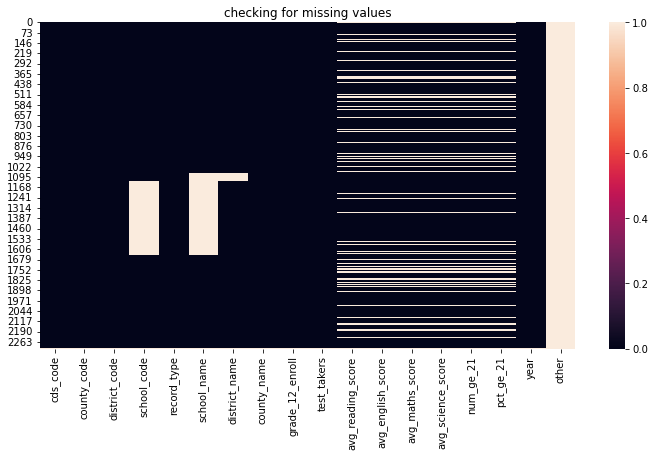

In [45]:
# Visualize trends of missing value to decide methods of treating missing values
fig, axes = plt.subplots(figsize=(12,6))

# Style
axes.set_title('checking for missing values')

# Plot
sns.heatmap(act_2019_ca.isnull());

# Missing school_code and school_name means it is a district/county level of record
# Missing district_name means it is a county level of record

In [46]:
# Drop 'other' column
act_2019_ca.drop('other',axis=1,inplace=True)

In [47]:
# Check null values
act_2019_ca.isnull().mean()*100

cds_code              0.043290
county_code           0.043290
district_code         0.043290
school_code          22.640693
record_type           0.043290
school_name          25.151515
district_name         2.554113
county_name           0.043290
grade_12_enroll       0.043290
test_takers           0.043290
avg_reading_score    15.454545
avg_english_score    15.454545
avg_maths_score      15.454545
avg_science_score    15.454545
num_ge_21            15.454545
pct_ge_21            15.454545
year                  0.043290
dtype: float64

In [48]:
# They're district level record so we will fill them with 'D level'
act_2019_ca['school_code'] = act_2019_ca['school_code'].fillna('D level')
act_2019_ca['school_name'] = act_2019_ca['school_name'].fillna('D level')

In [49]:
# Drop missing row from cds_code as it makes up only 0.04%
act_2019_ca = act_2019_ca[act_2019_ca['cds_code'].notna()]

In [50]:
# Similarly for district_name - they are county level record - fill with 'C level'
act_2019_ca['district_name'] = act_2019_ca['district_name'].fillna('C level')

In [51]:
# Fill those with 0 num and 0 percentage

act_2019_ca = act_2019_ca.fillna(0)

In [52]:
# Drop year column since its only one year
act_2019_ca = act_2019_ca.drop('year',axis=1)

In [53]:
# Check dataframe
act_2019_ca.head(3)

,cds_code,county_code,district_code,school_code,record_type,school_name,district_name,county_name,grade_12_enroll,test_takers,avg_reading_score,avg_english_score,avg_maths_score,avg_science_score,num_ge_21,pct_ge_21
0,3.366993e+13,33.0,3366993.0,129882.0,S,21st Century Learning Institute,Beaumont Unified,Riverside,18.0,0.0,0,0,0,0,0,0
1,1.964212e+13,19.0,1964212.0,1995596.0,S,ABC Secondary (Alternative),ABC Unified,Los Angeles,58.0,0.0,0,0,0,0,0,0
2,1.563776e+13,15.0,1563776.0,1530377.0,S,Abraham Lincoln Alternative,Southern Kern Unified,Kern,18.0,0.0,0,0,0,0,0,0


In [54]:
# Check datatype
act_2019_ca.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2309 entries, 0 to 2308
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   cds_code           2309 non-null   float64
 1   county_code        2309 non-null   float64
 2   district_code      2309 non-null   float64
 3   school_code        2309 non-null   object 
 4   record_type        2309 non-null   object 
 5   school_name        2309 non-null   object 
 6   district_name      2309 non-null   object 
 7   county_name        2309 non-null   object 
 8   grade_12_enroll    2309 non-null   float64
 9   test_takers        2309 non-null   float64
 10  avg_reading_score  2309 non-null   object 
 11  avg_english_score  2309 non-null   object 
 12  avg_maths_score    2309 non-null   object 
 13  avg_science_score  2309 non-null   object 
 14  num_ge_21          2309 non-null   object 
 15  pct_ge_21          2309 non-null   object 
dtypes: float64(5), object(11

Data Dictionary of `act_2019_ca` dataframe

|Field #|Field Name|Type|Dataset|Description|
|---|---|---|---|---|
|1|cds_code|float|act_2019_ca|County/District/School Code|
|2|county_code|float|act_2019_ca|County Code|
|3|district_code|float|act_2019_ca|District Code|
|4|school_code|str|act_2019_ca|School Code|
|5|record_type|str|act_2019_ca|Record Type: C=County, D=District, S=School, X=State|
|6|school_name|str|act_2019_ca|School Name, N/A = County or District Level Record|
|7|district_name|str|act_2019_ca|District/LEA Name, N/A = County Level Record|
|8|county_name|str|act_2019_ca|County Name|
|9|grade_12_enroll|float|act_2019_ca|Enrollment of Grade 12|
|10|test_takers|float|act_2019_ca|Number of Test Takers|
|11|avg_reading_score|str|act_2019_ca|Average ACT Reading Score|
|12|avg_english_score|str|act_2019_ca|Average ACT English Score|
|13|avg_maths_score|str|act_2019_ca|Average ACT Maths Score|
|14|avg_science_score|str|act_2019_ca|Average ACT Science Score|
|15|num_ge_21|str|act_2019_ca|Number of Test Takers Whose ACT Composite Scores Are Greater or Equal to 21.|
|16|pct_ge_21|str|act_2019_ca|Percent of Test Takers Whose ACT Composite Scores Are Greater or Equal to 21.|
|16|year|str|act_2019_ca|The ACT test administration year: 2018-19|

In [55]:
# Save dataframe to csv
act_2019_ca.to_csv('../data/cleaned/act_2019_ca_df_cleaned.csv')

#### Check out SAT in CA dataframe

In [56]:
# Set up a dictionary to rename column
cols = {'CDS':'cds_code', 'CCode':'county_code', 'CDCode':'district_code', 'SCode':'school_code', 'RType':'record_type',\
        'SName':'school_name', 'DName':'district_name', 'CName':'county_name','Enroll12':'grade_12_enroll',\
        'NumTSTTakr12':'grade_12_takers', 'NumERWBenchmark12':'grade_12_erw_bm_num',\
        'PctERWBenchmark12':'grade_12_erw_bm_pct','NumMathBenchmark12':'grade_12_maths_bm_num',\
        'PctMathBenchmark12':'grade_12_maths_bm_pct', 'Enroll11':'grade_11_enroll', 'NumTSTTakr11':'grade_11_takers',\
        'NumERWBenchmark11':'grade_11_erw_bm_num', 'PctERWBenchmark11':'grade_11_erw_bm_pct',\
        'NumMathBenchmark11':'grade_11_maths_bm_num','PctMathBenchmark11':'grade_11_maths_bm_pct',\
        'TotNumBothBenchmark12':'grade_12_total_bm_num', 'PctBothBenchmark12':'grade_12_total_bm_pct',\
        'TotNumBothBenchmark11':'grade_11_total_bm_num', 'PctBothBenchmark11':'grade_11_total_bm_pct',\
        'Year':'year', 'Unnamed: 25':'other'}

In [57]:
# Rename columns to proper naming
sat_2019_ca = sat_2019_ca.rename(columns = cols)

In [58]:
# Check that column is properly renamed 
sat_2019_ca.columns

Index(['cds_code', 'county_code', 'district_code', 'school_code',
       'record_type', 'school_name', 'district_name', 'county_name',
       'grade_12_enroll', 'grade_12_takers', 'grade_12_erw_bm_num',
       'grade_12_erw_bm_pct', 'grade_12_maths_bm_num', 'grade_12_maths_bm_pct',
       'grade_11_enroll', 'grade_11_takers', 'grade_11_erw_bm_num',
       'grade_11_erw_bm_pct', 'grade_11_maths_bm_num', 'grade_11_maths_bm_pct',
       'grade_12_total_bm_num', 'grade_12_total_bm_pct',
       'grade_11_total_bm_num', 'grade_11_total_bm_pct', 'year', 'other'],
      dtype='object')

In [59]:
# Check shape
sat_2019_ca.shape

(2580, 26)

In [60]:
# This column is empty so we will drop it
sat_2019_ca = sat_2019_ca.drop('other',axis=1)

In [61]:
# Check for null values
sat_2019_ca.isnull().mean()*100

cds_code                  0.038760
county_code               0.038760
district_code             0.038760
school_code               0.038760
record_type               0.038760
school_name              23.178295
district_name             2.286822
county_name               0.038760
grade_12_enroll           0.038760
grade_12_takers           0.038760
grade_12_erw_bm_num      10.697674
grade_12_erw_bm_pct      10.697674
grade_12_maths_bm_num    10.697674
grade_12_maths_bm_pct    10.697674
grade_11_enroll           0.038760
grade_11_takers           0.038760
grade_11_erw_bm_num      12.054264
grade_11_erw_bm_pct      12.054264
grade_11_maths_bm_num    12.054264
grade_11_maths_bm_pct    12.054264
grade_12_total_bm_num    10.697674
grade_12_total_bm_pct    10.697674
grade_11_total_bm_num    12.054264
grade_11_total_bm_pct    12.054264
year                      0.038760
dtype: float64

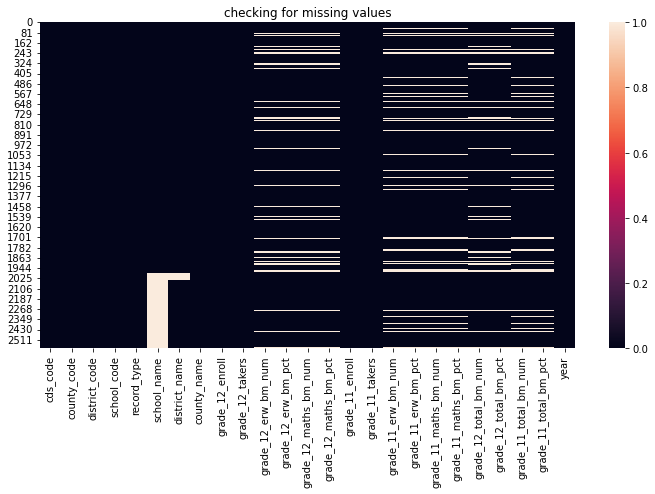

In [62]:
# Visualize trends of missing value to decide methods of treating missing values
fig, axes = plt.subplots(figsize=(12,6))

# Style
axes.set_title('checking for missing values')

# Plot
sns.heatmap(sat_2019_ca.isnull());

In [63]:
# Columns are not grouped properly, we will rearrange columns to group grade 11 and grade 12
cols_rearr = ['cds_code', 'county_code', 'district_code', 'school_code',
              'record_type', 'school_name', 'district_name', 'county_name',
              'grade_11_enroll', 'grade_11_takers','grade_11_erw_bm_num', 'grade_11_erw_bm_pct',
              'grade_11_maths_bm_num', 'grade_11_maths_bm_pct','grade_11_total_bm_num','grade_11_total_bm_pct', 
              'grade_12_enroll', 'grade_12_takers', 'grade_12_erw_bm_num','grade_12_erw_bm_pct',
              'grade_12_maths_bm_num','grade_12_maths_bm_pct','grade_12_total_bm_num', 'grade_12_total_bm_pct','year']

In [64]:
sat_2019_ca = sat_2019_ca.reindex(columns = cols_rearr)

In [65]:
# District and county level record so we will fill them with 'C/D level'
sat_2019_ca['school_name'] = sat_2019_ca['school_name'].fillna('C/D level')

In [66]:
# Similarly for district_name - they are county level record - fill with 'C level'
sat_2019_ca['district_name'] = sat_2019_ca['district_name'].fillna('C level')

In [67]:
# Investigating empty grade 12 records
sat_2019_ca[sat_2019_ca['grade_12_total_bm_num'].isnull()].head()

# Missing values from possibly mean there are no takers - similar case for grade 11

,cds_code,county_code,district_code,school_code,record_type,school_name,district_name,county_name,grade_11_enroll,grade_11_takers,...,grade_11_total_bm_pct,grade_12_enroll,grade_12_takers,grade_12_erw_bm_num,grade_12_erw_bm_pct,grade_12_maths_bm_num,grade_12_maths_bm_pct,grade_12_total_bm_num,grade_12_total_bm_pct,year
0,6.615981e+12,6.0,661598.0,630046.0,S,Colusa Alternative Home,Colusa Unified,Colusa,18.0,0.0,...,NaN,18.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2018-19
12,1.563776e+13,15.0,1563776.0,1530377.0,S,Abraham Lincoln Alternative,Southern Kern Unified,Kern,27.0,0.0,...,NaN,18.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2018-19
19,1.062117e+13,10.0,1062117.0,1030469.0,S,Enterprise Alternative,Clovis Unified,Fresno,15.0,0.0,...,NaN,18.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2018-19
36,3.768163e+13,37.0,3768163.0,137109.0,S,Diego Valley East Public Charter,Julian Union Elementary,San Diego,183.0,1.0,...,*,78.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2018-19
43,3.467314e+13,34.0,3467314.0,3430352.0,S,Las Flores High (Alternative),Elk Grove Unified,Sacramento,33.0,1.0,...,*,64.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2018-19


In [68]:
sat_2019_ca.isnull().sum()

cds_code                   1
county_code                1
district_code              1
school_code                1
record_type                1
school_name                0
district_name              0
county_name                1
grade_11_enroll            1
grade_11_takers            1
grade_11_erw_bm_num      311
grade_11_erw_bm_pct      311
grade_11_maths_bm_num    311
grade_11_maths_bm_pct    311
grade_11_total_bm_num    311
grade_11_total_bm_pct    311
grade_12_enroll            1
grade_12_takers            1
grade_12_erw_bm_num      276
grade_12_erw_bm_pct      276
grade_12_maths_bm_num    276
grade_12_maths_bm_pct    276
grade_12_total_bm_num    276
grade_12_total_bm_pct    276
year                       1
dtype: int64

In [69]:
# Check nulls for no test takers for both grade 11 and grade 12
sat_2019_ca[(sat_2019_ca['grade_11_takers'].isnull()) | (sat_2019_ca['grade_12_takers'].isnull())]

,cds_code,county_code,district_code,school_code,record_type,school_name,district_name,county_name,grade_11_enroll,grade_11_takers,...,grade_11_total_bm_pct,grade_12_enroll,grade_12_takers,grade_12_erw_bm_num,grade_12_erw_bm_pct,grade_12_maths_bm_num,grade_12_maths_bm_pct,grade_12_total_bm_num,grade_12_total_bm_pct,year
2579,NaN,NaN,NaN,NaN,NaN,C/D level,C level,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [70]:
# Only one so let's drop this
sat_2019_ca = sat_2019_ca[sat_2019_ca['grade_11_takers'].notnull()]

In [71]:
# Confirm that the row was dropped
sat_2019_ca.shape

(2579, 25)

In [72]:
# check data for 0 grade 11 takers
sat_2019_ca[sat_2019_ca['grade_11_takers'] == 0]\
[['grade_11_erw_bm_num','grade_11_erw_bm_pct','grade_11_maths_bm_num',\
  'grade_11_maths_bm_pct','grade_11_total_bm_num','grade_11_total_bm_pct']].shape

# Missing from grade 11 scores are from those with 0 takes we can fill this with 0

(310, 6)

In [73]:
# Check data for 0 grade 12 takers
sat_2019_ca[sat_2019_ca['grade_12_takers'] == 0]\
[['grade_12_erw_bm_num','grade_12_erw_bm_pct','grade_12_maths_bm_num',\
  'grade_12_maths_bm_pct','grade_12_total_bm_num','grade_12_total_bm_pct']].shape

# Missing from grade 12 scores are from those with 0 takes we can fill this with 0

(275, 6)

In [74]:
# Filter out only remaining missing columns
sat_2019_ca.isnull().sum()[sat_2019_ca.isnull().sum() != 0]

grade_11_erw_bm_num      310
grade_11_erw_bm_pct      310
grade_11_maths_bm_num    310
grade_11_maths_bm_pct    310
grade_11_total_bm_num    310
grade_11_total_bm_pct    310
grade_12_erw_bm_num      275
grade_12_erw_bm_pct      275
grade_12_maths_bm_num    275
grade_12_maths_bm_pct    275
grade_12_total_bm_num    275
grade_12_total_bm_pct    275
dtype: int64

In [75]:
# Fill those with 0 num and 0 percentage

sat_2019_ca = sat_2019_ca.fillna(0)

In [76]:
# Filter out only remaining missing columns
sat_2019_ca.isnull().sum()[sat_2019_ca.isnull().sum() != 0]
# No more missing

Series([], dtype: int64)

In [77]:
# Drop year column
sat_2019_ca = sat_2019_ca.drop('year',axis=1)

In [78]:
# Check dataframe
sat_2019_ca

,cds_code,county_code,district_code,school_code,record_type,school_name,district_name,county_name,grade_11_enroll,grade_11_takers,...,grade_11_total_bm_num,grade_11_total_bm_pct,grade_12_enroll,grade_12_takers,grade_12_erw_bm_num,grade_12_erw_bm_pct,grade_12_maths_bm_num,grade_12_maths_bm_pct,grade_12_total_bm_num,grade_12_total_bm_pct
0,6.615981e+12,6.0,661598.0,630046.0,S,Colusa Alternative Home,Colusa Unified,Colusa,18.0,0.0,...,0,0,18.0,0.0,0,0,0,0,0,0
1,6.616061e+12,6.0,661606.0,634758.0,S,Maxwell Sr High,Maxwell Unified,Colusa,26.0,6.0,...,*,*,29.0,10.0,*,*,*,*,*,*
2,1.964733e+13,19.0,1964733.0,1930924.0,S,Belmont Senior High,Los Angeles Unified,Los Angeles,219.0,174.0,...,11,6.32,206.0,102.0,31,30.39,14,13.73,14,13.73
3,1.964733e+13,19.0,1964733.0,1931476.0,S,Canoga Park Senior High,Los Angeles Unified,Los Angeles,333.0,275.0,...,35,12.73,227.0,113.0,54,47.79,18,15.93,18,15.93
4,1.964733e+13,19.0,1964733.0,1931856.0,S,Whitman Continuation,Los Angeles Unified,Los Angeles,17.0,5.0,...,*,*,18.0,14.0,*,*,*,*,*,*
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2574,5.075556e+13,50.0,5075556.0,0.0,D,C/D level,Riverbank Unified,Stanislaus,213.0,78.0,...,21,26.92,179.0,40.0,23,57.50,13,32.50,11,27.50
2575,5.772678e+13,57.0,5772678.0,0.0,D,C/D level,Davis Joint Unified,Yolo,739.0,474.0,...,421,88.82,717.0,307.0,293,95.44,274,89.25,268,87.30
2576,7.000000e+12,7.0,700000.0,0.0,C,C/D level,C level,Contra Costa,14120.0,5157.0,...,3853,74.71,14593.0,5412.0,3798,70.18,2814,52.00,2721,50.28
2577,1.700000e+13,17.0,1700000.0,0.0,C,C/D level,C level,Lake,731.0,126.0,...,47,37.30,667.0,167.0,123,73.65,71,42.51,65,38.92


In [79]:
# Check how much '*' makes up the total data for grade 11

# Total number of grade 11 takers from 'hidden schools'
private_takers = sum(sat_2019_ca[sat_2019_ca['grade_11_total_bm_num']=='*']['grade_11_takers'])

# Total number of grade 11 takers from 'record type - S'
total_takers = sum(sat_2019_ca[sat_2019_ca['record_type']=='S']['grade_11_takers'])

# Number of mean scores that we'll be dropping
private_takers/total_takers*100

1.2484509333126792

In [80]:
# Check how much '*' makes up the total data for grade 11

# Total number of grade 11 takers from 'hidden schools'
private_takers = sum(sat_2019_ca[sat_2019_ca['grade_12_total_bm_num']=='*']['grade_12_takers'])

# Total number of grade 11 takers from 'record type - S'
total_takers = sum(sat_2019_ca[sat_2019_ca['record_type']=='S']['grade_12_takers'])

# Number of mean scores that we'll be dropping
private_takers/total_takers*100

1.618556156325402

In [81]:
# For further exploration we will separate dataframes
# We will drop rows with '*' since they make up very little percentage of students

# Dataframe of grade 11 takers
sat_2019_ca_11 = sat_2019_ca[sat_2019_ca['grade_11_total_bm_num'] != '*']

# Dataframe of grade 12 takers
sat_2019_ca_12 = sat_2019_ca[sat_2019_ca['grade_12_total_bm_num'] != '*']

# Dataframe of both grade 11 and grade 12 takers
sat_2019_ca_both = sat_2019_ca[(sat_2019_ca['grade_11_total_bm_num'] != '*') & (sat_2019_ca['grade_12_total_bm_num'] != '*')]

In [82]:
# Check columns
sat_2019_ca_both.columns

Index(['cds_code', 'county_code', 'district_code', 'school_code',
       'record_type', 'school_name', 'district_name', 'county_name',
       'grade_11_enroll', 'grade_11_takers', 'grade_11_erw_bm_num',
       'grade_11_erw_bm_pct', 'grade_11_maths_bm_num', 'grade_11_maths_bm_pct',
       'grade_11_total_bm_num', 'grade_11_total_bm_pct', 'grade_12_enroll',
       'grade_12_takers', 'grade_12_erw_bm_num', 'grade_12_erw_bm_pct',
       'grade_12_maths_bm_num', 'grade_12_maths_bm_pct',
       'grade_12_total_bm_num', 'grade_12_total_bm_pct'],
      dtype='object')

In [83]:
# There are some unnecessary columns we will drop those columns to tidy up our data
# Set up columns to drop

# Columns to drop in all 
cols_to_drop = ['cds_code', 'county_code', 'district_code', 'school_code']

# Columns to drop in grade 11 df
cols_to_drop_11 = ['grade_11_enroll', 'grade_11_takers', 'grade_11_erw_bm_num',
       'grade_11_erw_bm_pct', 'grade_11_maths_bm_num', 'grade_11_maths_bm_pct',
       'grade_11_total_bm_num', 'grade_11_total_bm_pct']

# Columns to drop in grade 12 df
cols_to_drop_12 = ['grade_12_enroll',
       'grade_12_takers', 'grade_12_erw_bm_num', 'grade_12_erw_bm_pct',
       'grade_12_maths_bm_num', 'grade_12_maths_bm_pct',
       'grade_12_total_bm_num', 'grade_12_total_bm_pct']

# Columns to turn to type to float
cols_to_float_11 = ['grade_11_erw_bm_num','grade_11_erw_bm_pct', 'grade_11_maths_bm_num', 'grade_11_maths_bm_pct',
                    'grade_11_total_bm_num', 'grade_11_total_bm_pct']

cols_to_float_12 = ['grade_12_erw_bm_num', 'grade_12_erw_bm_pct','grade_12_maths_bm_num', 'grade_12_maths_bm_pct',
                    'grade_12_total_bm_num', 'grade_12_total_bm_pct']

In [84]:
# Loop columns to drop for each dataframe
for cols in cols_to_drop:
    sat_2019_ca_11 = sat_2019_ca_11.drop(cols,axis=1)
    sat_2019_ca_12 = sat_2019_ca_12.drop(cols,axis=1)
    sat_2019_ca_both = sat_2019_ca_both.drop(cols,axis=1)

In [85]:
# Loop columns to drop for grade 12 dataframe
for cols in cols_to_drop_12:
    sat_2019_ca_11 =  sat_2019_ca_11.drop(cols, axis=1)

In [86]:
# Loop columns to drop for grade 11 dataframe
for cols in cols_to_drop_11:
    sat_2019_ca_12 =  sat_2019_ca_12.drop(cols, axis=1)

In [87]:
# Loop columns to turn into float for all dataframe

for cols in cols_to_float_11:
    sat_2019_ca_11[cols] = sat_2019_ca_11[cols].apply(lambda x : float(x))
    sat_2019_ca_both[cols] = sat_2019_ca_both[cols].apply(lambda x : float(x))
    
for cols in cols_to_float_12:
    sat_2019_ca_12[cols] = sat_2019_ca_12[cols].apply(lambda x : float(x))
    sat_2019_ca_both[cols] = sat_2019_ca_both[cols].apply(lambda x : float(x))

In [88]:
# Save to csv
sat_2019_ca_11.to_csv('../data/cleaned/sat_2019_ca_11_cleaned.csv')
sat_2019_ca_12.to_csv('../data/cleaned/sat_2019_ca_12_cleaned.csv')
sat_2019_ca_both.to_csv('../data/cleaned/sat_2019_ca_both_cleaned.csv')

In [89]:
sat_2019_ca.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2579 entries, 0 to 2578
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   cds_code               2579 non-null   float64
 1   county_code            2579 non-null   float64
 2   district_code          2579 non-null   float64
 3   school_code            2579 non-null   float64
 4   record_type            2579 non-null   object 
 5   school_name            2579 non-null   object 
 6   district_name          2579 non-null   object 
 7   county_name            2579 non-null   object 
 8   grade_11_enroll        2579 non-null   float64
 9   grade_11_takers        2579 non-null   float64
 10  grade_11_erw_bm_num    2579 non-null   object 
 11  grade_11_erw_bm_pct    2579 non-null   object 
 12  grade_11_maths_bm_num  2579 non-null   object 
 13  grade_11_maths_bm_pct  2579 non-null   object 
 14  grade_11_total_bm_num  2579 non-null   object 
 15  grad

Data Dictionary of `sat_2019_ca` dataframe

|Field #|Field Name|Type|Dataset|Description|
|---|---|---|---|---|
|0|cds_code|float|sat_2019_ca|County/District/School Code|
|1|county_code|float|sat_2019_ca|County Code|
|2|district_code|float|sat_2019_ca|District Code|
|3|school_code|float|sat_2019_ca|School Code|
|4|record_type|str|sat_2019_ca|Record Type: C=County, D=District, S=School, X=State|
|5|school_name|str|sat_2019_ca|School Name, N/A = County or District Level Record|
|6|district_name|str|sat_2019_ca|District/LEA Name, N/A = County Level Record|
|7|county_name|str|sat_2019_ca|County Name|
|8|grade_11_enroll|float|sat_2019_ca|Enrollment of Grade 11|
|9|grade_11_takers|float|sat_2019_ca|Number of Test Takers Grade 11|
|10|grade_11_erwb_bm_num|str|sat_2019_ca|The number meeting the Evidence-Based Reading & Writing (ERW) benchmark established by the College Board based on the New 2016 SAT test format as of March 2016 for Grade 11.|
|11|grade_11_erwb_bm_pct|str|sat_2019_ca|The percent of students who met or exceeded the benchmark for Evidence-Based Reading & Writing (ERW) test for Grade 11.|
|12|grade_11_erwb_maths_num|str|sat_2019_ca|The number of students who met or exceeded the benchmark for the New SAT Math test format as of March 2016 for Grade 11.|
|13|grade_11_maths_bm_pct|str|sat_2019_ca|The percent of students who met or exceeded the benchmark for SAT Math test for Grade 11.|
|14|grade_11_meet_bm_num|str|sat_2019_ca7|The total number of students who met the benchmark of both Evidence-Based Reading & Writing (ERW) and Math Grade 11.|
|15|grade_11_meet_bm_pct|str|sat_2019_ca|The percent of students who met the benchmark of both Evidence-Based Reading & Writing (ERW) and Math Grade 11.|
|16|grade_12_enroll|float|sat_2019_ca|Enrollment of Grade 12|
|17|grade_12_takers|float|sat_2019_ca|Number of Test Takers Grade 12|
|18|grade_12_erwb_bm_num|str|sat_2019_ca|The number meeting the Evidence-Based Reading & Writing (ERW) benchmark established by the College Board based on the New 2016 SAT test format as of March 2016 for Grade 12.|
|19|grade_12_erwb_bm_pct|str|sat_2019_ca|The percent of students who met or exceeded the benchmark for Evidence-Based Reading & Writing (ERW) test for Grade 12.|
|20|grade_12_maths_bm_num|str|sat_2019_ca|The number of students who met or exceeded the benchmark for the New SAT Math test format as of March 2016 for Grade 12.|
|21|grade_12_maths_bm_pct|str|sat_2019_ca|The percent of students who met or exceeded the benchmark for SAT Math test for Grade 12.|
|22|grade_12_meet_bm_num|str|sat_2019_ca|The total number of students who met the benchmark of both Evidence-Based Reading & Writing (ERW) and Math Grade 12.|
|23|grade_12_meet_bm_pct|str|sat_2019_ca|The percent of students who met the benchmark of both Evidence-Based Reading & Writing (ERW) and Math Grade 12.|

In [90]:
# Save to csv
sat_2019_ca.to_csv('../data/cleaned/sat_2019_ca_df_cleaned.csv')

#### Data Cleaning : SAT scores by Intended college major in 2019

In [91]:
# Reading the dataframe
sat_2019_by_c_maj.head(5)

,IntendedCollegeMajor,TestTakers,Percent,Total,ReadingWriting,Math
0,"Agriculture, AgricultureOperations, and Relate...","24,913",1%,977,496,481
1,Architecture and Related Services,"28,988",2%,1047,520,527
2,"Area, Ethnic, Cultural, and Gender Studies","2,629",0%,1040,536,504
3,Biological and Biomedical Sciences,"155,834",8%,1139,572,566
4,"Business, Management, Marketing, and Related S...","221,523",12%,1072,534,537


In [92]:
# Check info
sat_2019_by_c_maj.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   IntendedCollegeMajor  38 non-null     object
 1   TestTakers            38 non-null     object
 2   Percent               38 non-null     object
 3   Total                 38 non-null     int64 
 4   ReadingWriting        38 non-null     int64 
 5   Math                  38 non-null     int64 
dtypes: int64(3), object(3)
memory usage: 1.9+ KB


In [93]:
# Set up a dictionary to rename columns

cols_name = {'IntendedCollegeMajor':'intended_college_major','TestTakers':'test_takers',\
             'Percent':'percent','Total':'total','ReadingWriting':'reading_writing','Math':'maths'}

sat_2019_by_c_maj = sat_2019_by_c_maj.rename(columns=cols_name)

In [94]:
# Change test_takers data to float
sat_2019_by_c_maj['test_takers'] = sat_2019_by_c_maj['test_takers'].apply(convert_num)

In [95]:
# Recalculate 'percent' column since they will have rounding error if we use string conversion
sat_2019_by_c_maj['percent'] = sat_2019_by_c_maj['test_takers'].apply(lambda x : x / sum(sat_2019_by_c_maj['test_takers']))

In [96]:
# Check dataframe
sat_2019_by_c_maj.head(3)

,intended_college_major,test_takers,percent,total,reading_writing,maths
0,"Agriculture, AgricultureOperations, and Relate...",24913.0,0.013547,977,496,481
1,Architecture and Related Services,28988.0,0.015763,1047,520,527
2,"Area, Ethnic, Cultural, and Gender Studies",2629.0,0.001430,1040,536,504


In [97]:
# Check datatype
sat_2019_by_c_maj.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   intended_college_major  38 non-null     object 
 1   test_takers             38 non-null     float64
 2   percent                 38 non-null     float64
 3   total                   38 non-null     int64  
 4   reading_writing         38 non-null     int64  
 5   maths                   38 non-null     int64  
dtypes: float64(2), int64(3), object(1)
memory usage: 1.9+ KB


In [98]:
# Save cleaned df to csv
sat_2019_by_c_maj.to_csv('../data/cleaned/sat_2019_by_college_major_cleaned.csv')

#### Data Cleaning : check acceptance by college

In [99]:
# Check dataframe
sat_act_by_college.head(3)

,School,Test Optional?,Applies to Class Year(s),Policy Details,Number of Applicants,Accept Rate,SAT Total 25th-75th Percentile,ACT Total 25th-75th Percentile
0,Stanford University,Yes,2021,Stanford has adopted a one-year test optional ...,47452,4.3%,1440-1570,32-35
1,Harvard College,Yes,2021,Harvard has adopted a one-year test optional p...,42749,4.7%,1460-1580,33-35
2,Princeton University,Yes,2021,Princeton has adopted a one-year test optional...,35370,5.5%,1440-1570,32-35


In [100]:
# Check datatype
sat_act_by_college.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 416 entries, 0 to 415
Data columns (total 8 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   School                          416 non-null    object
 1   Test Optional?                  416 non-null    object
 2   Applies to Class Year(s)        390 non-null    object
 3   Policy Details                  416 non-null    object
 4   Number of Applicants            416 non-null    int64 
 5   Accept Rate                     416 non-null    object
 6   SAT Total 25th-75th Percentile  416 non-null    object
 7   ACT Total 25th-75th Percentile  416 non-null    object
dtypes: int64(1), object(7)
memory usage: 26.1+ KB


In [101]:
# Check for null values
sat_act_by_college.isnull().mean()

School                            0.0000
Test Optional?                    0.0000
Applies to Class Year(s)          0.0625
Policy Details                    0.0000
Number of Applicants              0.0000
Accept Rate                       0.0000
SAT Total 25th-75th Percentile    0.0000
ACT Total 25th-75th Percentile    0.0000
dtype: float64

In [102]:
# Setup a dictionary to rename column
cols_name = {'School':'school','Test Optional?':'test_optional',\
             'Applies to Class Year(s)':'applied_class_yr','Policy Details':'policy',\
             'Number of Applicants':'num_applicants','Accept Rate':'acceptance_rate',\
             'SAT Total 25th-75th Percentile':'sat_25_75',\
             'ACT Total 25th-75th Percentile':'act_25_75'}

In [103]:
# Rename column
sat_act_by_college = sat_act_by_college.rename(columns=cols_name)

In [104]:
# Convert acceptance rate to percentage
sat_act_by_college['acceptance_rate'] = sat_act_by_college['acceptance_rate'].apply(convert_pct)

In [105]:
# Drop typos columns
sat_act_by_college = sat_act_by_college[sat_act_by_college['sat_25_75'].str.contains('\u200b\u200b') == False]
sat_act_by_college = sat_act_by_college[sat_act_by_college['act_25_75'].str.contains('\u200b\u200b') == False]

In [106]:
# Drop typos columns
sat_act_by_college = sat_act_by_college[sat_act_by_college['sat_25_75'].str.contains('--') == False]
sat_act_by_college = sat_act_by_college[sat_act_by_college['act_25_75'].str.contains('--') == False]

In [107]:
# Split sat and act 25 and 75 percentile column for further exploration

# Split SAT 
sat_act_by_college['sat_25'] = sat_act_by_college['sat_25_75'].apply(lambda x : float(x.split('-')[0]))
sat_act_by_college['sat_75'] = sat_act_by_college['sat_25_75'].apply(lambda x : float(x.split('-')[1]))

# Split ACT
sat_act_by_college['act_25'] = sat_act_by_college['act_25_75'].apply(lambda x : float(x.split('-')[0]))
sat_act_by_college['act_75'] = sat_act_by_college['act_25_75'].apply(lambda x : float(x.split('-')[1]))

In [108]:
# Remove column sat_25_75 and act_25_75

sat_act_by_college = sat_act_by_college.drop('sat_25_75',axis=1)
sat_act_by_college = sat_act_by_college.drop('act_25_75',axis=1)

In [109]:
sat_act_by_college.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 401 entries, 0 to 415
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   school            401 non-null    object 
 1   test_optional     401 non-null    object 
 2   applied_class_yr  376 non-null    object 
 3   policy            401 non-null    object 
 4   num_applicants    401 non-null    int64  
 5   acceptance_rate   401 non-null    float64
 6   sat_25            401 non-null    float64
 7   sat_75            401 non-null    float64
 8   act_25            401 non-null    float64
 9   act_75            401 non-null    float64
dtypes: float64(5), int64(1), object(4)
memory usage: 34.5+ KB


Data Dictionary of `sat_act_by_college` dataframe

|Field #|Field Name|Type|Dataset|Description|
|---|---|---|---|---|
|0|school|str|act_df|State in the US|
|1|test_optional|str|act_df|Whether SAT/ACT is option|
|2|applied_class_yr|str|act_df|Start year of policy|
|3|policy|int64|str|Policy of optional SAT/ACT|
|4|num_applicants|int64|act_df|Number of applicants for that university|
|5|acceptance_rate|float|act_df|Acceptance rate of university|
|6|sat_25|int64|float|25th percentile of accepted SAT score|
|7|sat_75|int64|float|75th percentile of accepted SAT score|
|8|act_25|int64|float|25th percentile of accepted ACT score|
|8|act_27|int64|float|75th percentile of accepted ACT score|

In [110]:
# Save to df to csv
sat_act_by_college.to_csv('../data/cleaned/sat_act_by_college_cleaned.csv')